# Interpreting the PCA

One of the most useful applications of the Principal Component Analysis is to use the interpretation of the analysis for Latent Feature Extraction.

Recall that each dimension found by the PCA is a linear combination of the $p$ features so that each Principal Component is given by 

$$Z_i = \phi_{1i}X_1 + \phi_{2i}X_2 + \dots + \phi_{pi}X_p$$

It is of note that each $\phi_i = (\phi_{i1}, \phi_{i2}, \dots, \phi_{p1})$ is normalized in the linear algebra sense so that the magniture of each, $\rvert\phi_i\rvert = 1$.

*Introduction to Statistical Learning* refers to these $\phi_{ij}$ as **loadings**. 

Consider the following example we looked at previously:


In [1]:
cd ..

/home/samoht25/uclax-data-science/09-PCA-tutorial


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame as DF
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer_df = pd.read_pickle('data/final.p')

In [19]:
np.random.seed(42)

sample_df = customer_df.sample(5)
sample_df

,delicatessen,detergents_paper,fresh,frozen,grocery,milk
265,1.335514,-0.090536,-0.253032,1.596124,0.996983,1.894702
78,-1.222726,-0.664335,0.257736,0.219612,-0.775960,-0.980451
347,0.097443,0.966047,1.256233,0.460567,0.884990,0.687206
255,-0.319838,-1.194849,1.436007,0.580868,-1.038894,-1.718111
327,-0.446127,-1.313735,-1.586778,-1.006576,-0.953178,-1.210347


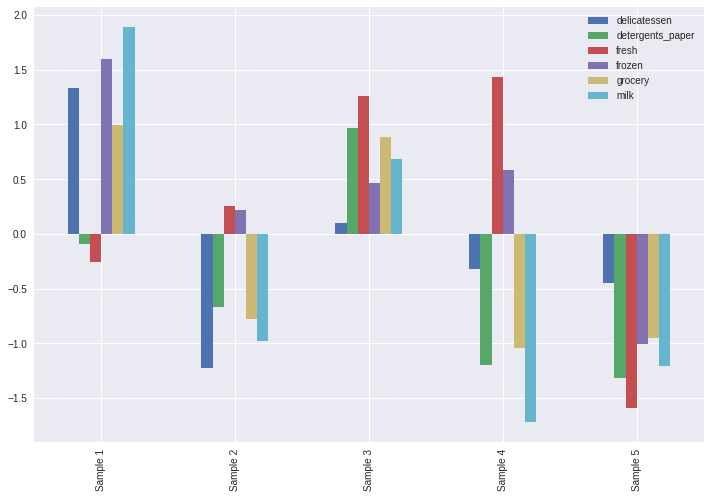

In [21]:
sample_df.plot(kind='bar', figsize=(12,8))
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

In [6]:
from sklearn.decomposition import PCA

In [7]:
np.random.seed(1)
pca = PCA()
pca.fit(customer_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca.components_[0] = -pca.components_[0]
pca.components_[0]

array([-0.24148947, -0.54615975,  0.09173853,  0.1219818 , -0.57087861,
       -0.54239695])

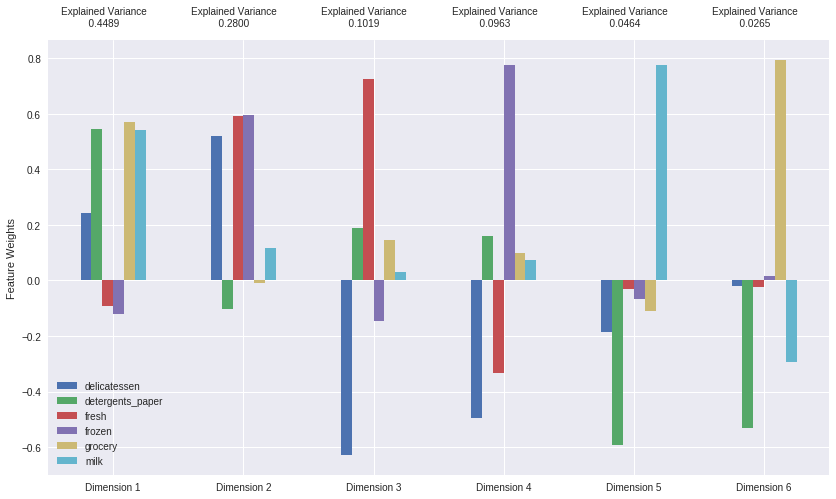

In [9]:
import lib.viz_helper as viz
pca_df = viz.pca_results(customer_df, pca)


In [13]:
pca_reduced = PCA(2)
pca_reduced.fit(customer_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca_reduced.components_[0] = -pca_reduced.components_[0]

In [15]:
latent_variables = ['retailer', 'restaurant']

In [26]:
sample_pca_df = pd.DataFrame(pca_reduced.transform(sample_df), 
                             columns=latent_variables,
                             index=sample_df.index)
sample_pca_df

,retailer,restaurant
265,1.698417,1.718042
78,-1.683314,-0.389460
347,1.257681,1.041918
255,-2.457389,0.962675
327,-1.757529,-1.768776


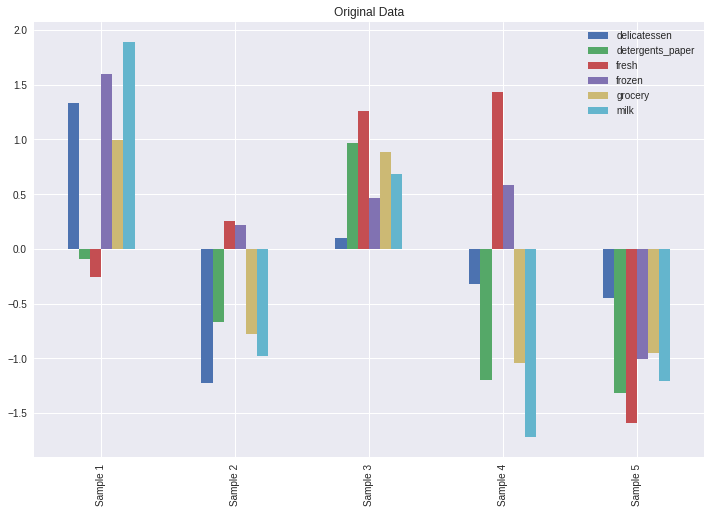

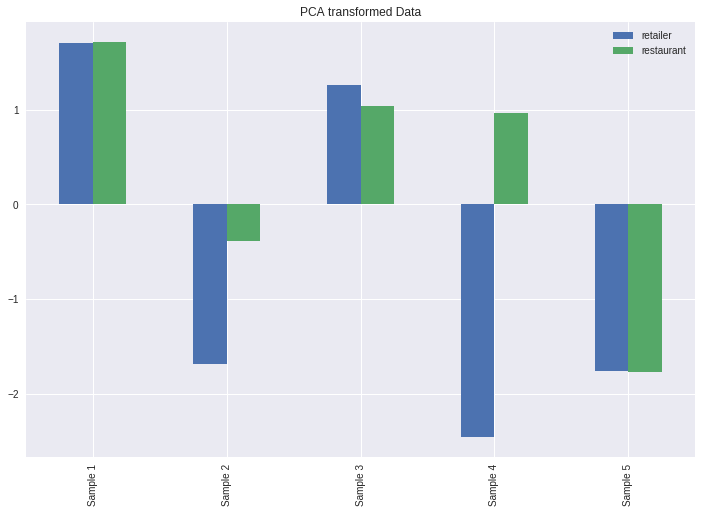

In [17]:
sample_df.plot(kind='bar', figsize=(12,8))
plt.title("Original Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

sample_pca_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])


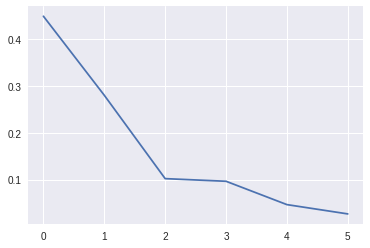

In [18]:
plt.plot(pca.explained_variance_ratio_)